# Описание проекта

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

•	лог сервера с данными об их посещениях,

•	выгрузка их покупок за этот период,

•	рекламные расходы.

Вам предстоит изучить:

•	откуда приходят пользователи и какими устройствами они пользуются,

•	сколько стоит привлечение пользователей из различных рекламных каналов;

•	сколько денег приносит каждый клиент,

•	когда расходы на привлечение клиента окупаются,

•	какие факторы мешают привлечению клиентов.


Ход исследования:

1. Загрузить и обработать данные;
2. Сформировать профили пользователей;
3. Сделать анализ данных по различным факторам;
4. Произвести рассчет метрик, визуализация;
5. Сделать выводы и предложить рекомендации

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

Изучить датасет visits

In [4]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Перевести формат даты из строк в даты

In [5]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'], format="%Y.%m.%d %H:%M:%S")
visits['Session End'] = pd.to_datetime(visits['Session End'], format="%Y.%m.%d %H:%M:%S")

In [6]:
visits.columns.to_list()

['User Id', 'Region', 'Device', 'Channel', 'Session Start', 'Session End']

Привести к удобному формату

In [7]:
visits.columns = ['user_id', 'region', 'device','channel', 'session_start', 'session_end']


Поиск пропусков

In [8]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Пропусков не обнаружено, поиск дубликатов

In [9]:
visits.duplicated().sum()

0

Дубликаты не обнаружены

Изучить датасет orders. Провести анализ аналогично датасету visits.

In [10]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
orders.columns.to_list()

['User Id', 'Event Dt', 'Revenue']

In [12]:
orders.columns = ['user_id', 'event_dt','revenue']

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [14]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [15]:
orders.duplicated().sum()

0

Изучить датасет costs аналагично датасетам visits и orders

In [16]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [17]:
costs.columns.to_list()

['dt', 'Channel', 'costs']

In [18]:
costs.columns = ['dt', 'channel','costs']

In [19]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [20]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [21]:
costs.duplicated().sum()

0

Данные приведены к удобному формату, пропусков и дубликатов не обнаружено.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Задать функцию для сглаживания данных

In [22]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

 Задать функцию для создания профилей пользователей

In [23]:
def get_profiles(sessions, orders, costs):

    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] =  profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Задать функцию для подсчёта Retention Rate, а затем для создания ее графика

In [24]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на 14-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на 14-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


Задать функцию для подсчёта конверсии, а затем для создания ее графика

In [25]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на 14-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


Задать функцию для подсчёта LTV, а затем для создания ее графика и графика ROI

In [26]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на 14-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True,ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на 14-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

•	Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.

In [27]:
profiles = get_profiles(visits, orders, costs)
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [28]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

Минимальная дата привлечения пользователей - 1 мая 2019 года в 00:00:41

Максимальная дата привлечения пользователей - 27 октября 2019 года в 23:59:04

•	Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 

In [29]:
def pivot_share(column, df):
    result = pd.DataFrame()
    result['users'] = df.groupby(column)['user_id'].count()
    result['users_share'] = ((result['users'] / df[column].count()) * 100)
    result['payer_users'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_share'] = ((result['payer_users'] / result['users']) * 100)
    return result.sort_values(by='users_share', ascending=False).style.format({'users_share': '{:.2f}%', 'payer_share': '{:.2f}%'})

In [30]:
pivot_share('region', profiles)

,users,users_share,payer_users,payer_share
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


Пользователи приходят из США, Великобритании, Франции и Германии. БОльшая часть платящих пользователей из США - 6.9%, процент платящих пользователей из других стран примерно на одном уровне (около 4%)

•	Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 

In [31]:
device_payer = pd.DataFrame()
device_payer['payer_users'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer['%'] = ((device_payer['payer_users'] / profiles.query('payer == True')['device'].count()) * 100)
device_payer.sort_values(by = 'payer_users', ascending=False)
pivot_share('device', profiles)

,users,users_share,payer_users,payer_share
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


Клиенты пользуются устройствами iPhone, Android, Mac и PС. Однако среди платящих пользователей наиболее предпочтительным является Mac (6.36%) и iPhone (6.21%), наименее популярным является PC - 5.05%.

•	Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. 

In [32]:
channel_payer = pd.DataFrame()
channel_payer['payer_users'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_payer['%'] = ((channel_payer['payer_users'] / profiles.query('payer == True')['device'].count()) * 100)
channel_payer.sort_values(by = 'payer_users', ascending=False)
pivot_share('channel', profiles)

,users,users_share,payer_users,payer_share
channel,,,,
organic,56439,37.62%,1160,2.06%
FaceBoom,29144,19.43%,3557,12.20%
TipTop,19561,13.04%,1878,9.60%
OppleCreativeMedia,8605,5.74%,233,2.71%
LeapBob,8553,5.70%,262,3.06%
WahooNetBanner,8553,5.70%,453,5.30%
RocketSuperAds,4448,2.97%,352,7.91%
MediaTornado,4364,2.91%,156,3.57%
YRabbit,4312,2.87%,165,3.83%


Лидером среди каналов привлечения платящих пользователей является FaceBoom - 12.20%. На втором месте - AdNonSense(11.34%). На третьем месте - lambdaMediaAds(10.47%).
Наименьшую часть платящих пользователей приносят органические пользователи(2.06%) и OppleCreativeMedia (2.71%)

Была определена минимальная и максимальная даты привлечения пользователей;
Были рассчитаны количество и доля платящих пользователей по географическому положению (топ -  США);
Выяснено, что большинство пользователей используют продукцию компании iPhone, Mac, a
каналы Faceboom и AdNonSense являются лидерами по привлечению платящих пользователей 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

•	Посчитать общую сумму расходов на маркетинг.

In [33]:
costs['costs'].sum().round(2)

105497.3

•	Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [34]:
channel_costs = pd.DataFrame()
channel_costs['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs['share'] = ((channel_costs['costs'] / costs['costs'].sum()) * 100)
channel_costs.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,costs,share
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Наибольшие затраты пришлись на каналы TipTop (51.9%) и FaceBoom (30.8%). В прошлом разделе было выяснено, что эти два канала и являются главными источниками привлечения клиентов. Однако на 1 месте среди каналов привлечения клиентов был FaceBoom, но в данном пункте видно, что затрат на него ушло намного меньше, чем TipTop, находящийся на втором месте среди каналов привлечения

•	Построить визуализацию динамики изменения расходов во времени по каждому источнику на одном графике. 

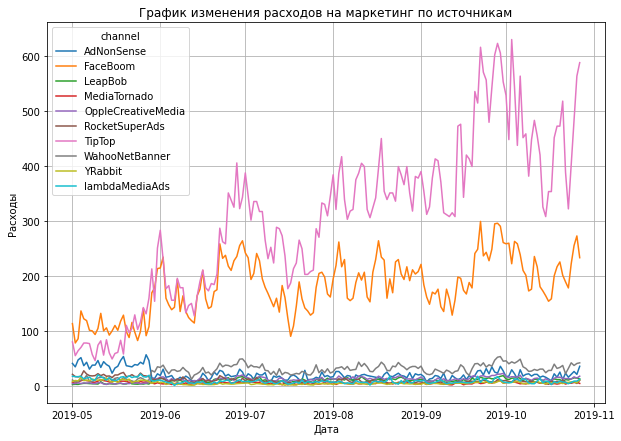

In [35]:
time_costs = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

time_costs.plot(
           figsize=(10, 7),
           grid=True,               
           legend=True)

plt.title('График изменения расходов на маркетинг по источникам')
plt.xlabel('Дата')
plt.ylabel('Расходы')
plt.show()

In [36]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.date

costs.groupby('costs_month') \
        .agg ({'costs': 'sum'}) \
        .sort_values('costs_month')

,costs
costs_month,
2019-05-01,9978.570
2019-06-01,15090.045
2019-07-01,16447.060
2019-08-01,20657.870
2019-09-01,22441.340
2019-10-01,20882.415


In [37]:
costs['costs_week'] = costs['dt'].astype('datetime64[W]').dt.date

costs.groupby('costs_week') \
        .agg ({'costs': 'sum'}) \
        .sort_values('costs_week')

,costs
costs_week,
2019-04-25,304.820
2019-05-02,2015.130
2019-05-09,1956.045
2019-05-16,2122.735
2019-05-23,2574.860
2019-05-30,3441.130
2019-06-06,2713.210
2019-06-13,2880.690
2019-06-20,4168.225


Наименьшие затраты были в мае, а наибольшие в сентябре.

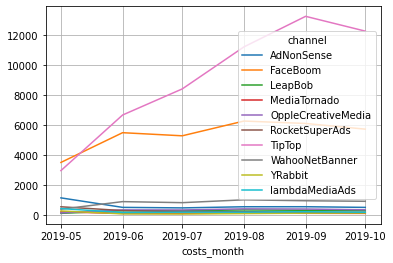

In [41]:
costs_m=costs.pivot_table(
    index='costs_month', columns='channel', values='costs', aggfunc='sum'
)
costs_m.plot(grid = True);

Привлечение каналов TipTop и FaceBoom заметно более затратно, рост идет на протяжении всего периода и достигает пика в сентябре.

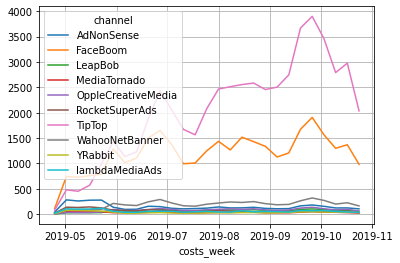

In [42]:
costs_w=costs.pivot_table(
    index='costs_week', columns='channel', values='costs', aggfunc='sum'
)
costs_w.plot(grid = True);

Привлечение каналов TipTop и FaceBoom заметно более затратно, однако в конце сентября наблюдается спад.

На каналы Faceboom и Tiptop наблюдается рост расходов с мая, июня, расходы по остальным каналам статичны

•	Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [37]:
channel_cac = pd.DataFrame()
channel_cac['costs_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
channel_cac.sort_values(by='costs_mean', ascending=False).style.format({'costs_mean': '{:.2f}'})

,costs_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Наибольшая стоимость у канала привлечения TipTop - в среднем 2.8 у.е.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

•	Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [38]:
observation_date = datetime(2019, 11, 1).date()  
horizon_days = 14
profiles = profiles.query('channel != "organic"')

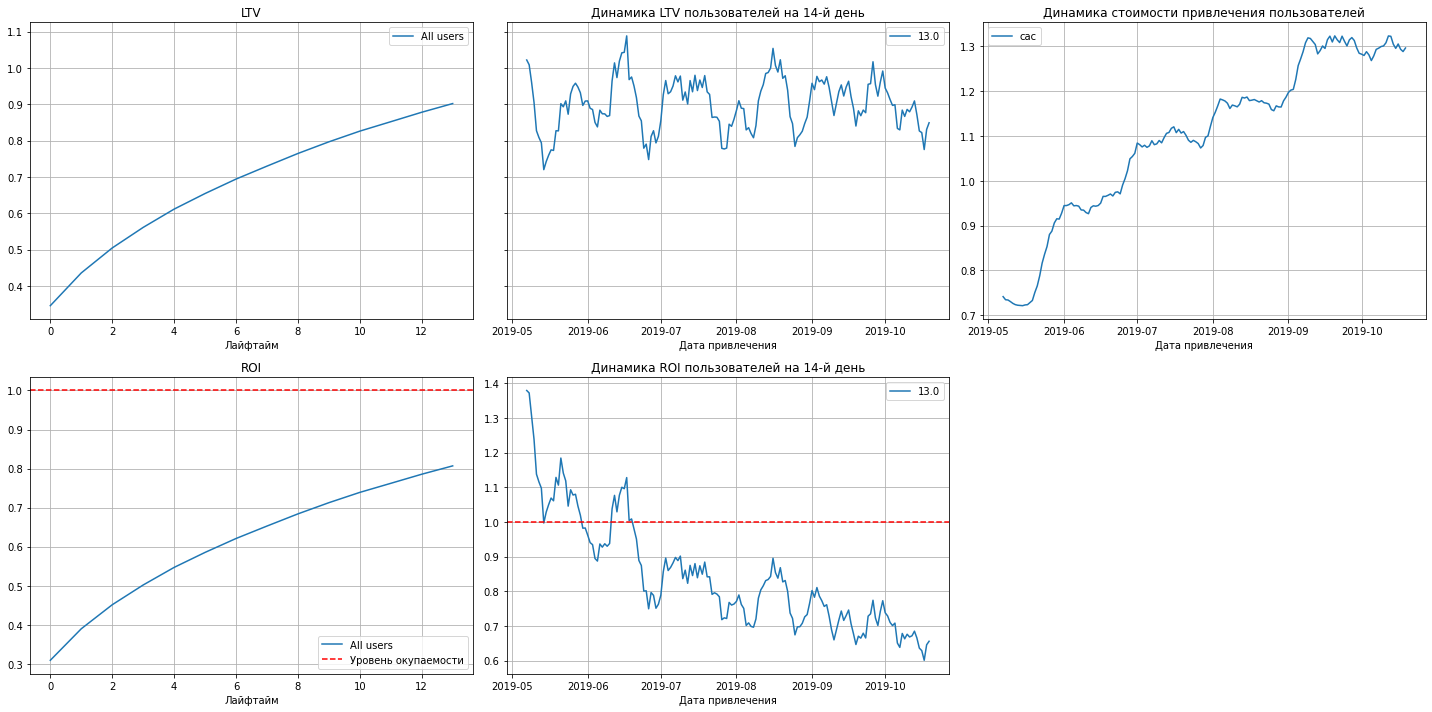

In [39]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Реклама не окупается, так как ROI на конец недели равен 80%. Падение ROI наблюдается с середины июня, поэтому привлечение пользователей не окупается. По графику динамики LTV видно, что данный показатель довольно стабилен, в динамике САС заметен рост расходов на привлечение пользователей.

•	Проанализировать окупаемость рекламы с разбивкой по устройствам. 

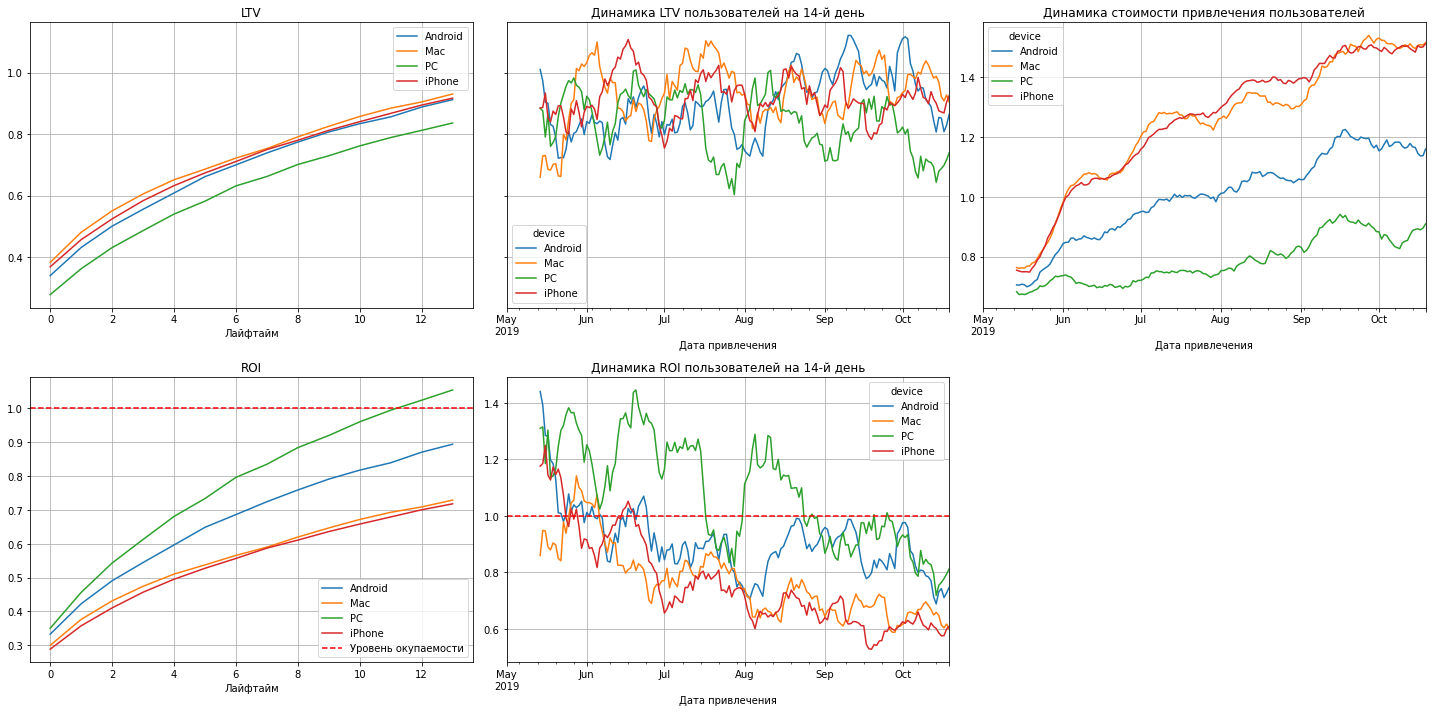

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

ROI: Пользователи с РС окупались практически весь период анализа, а пользователи других устройств нет. Однако у пользователей Android имелись положительные скачки.
LTV: Стабильный.
САС: Рост показателя, особенно у iPhone и Mac

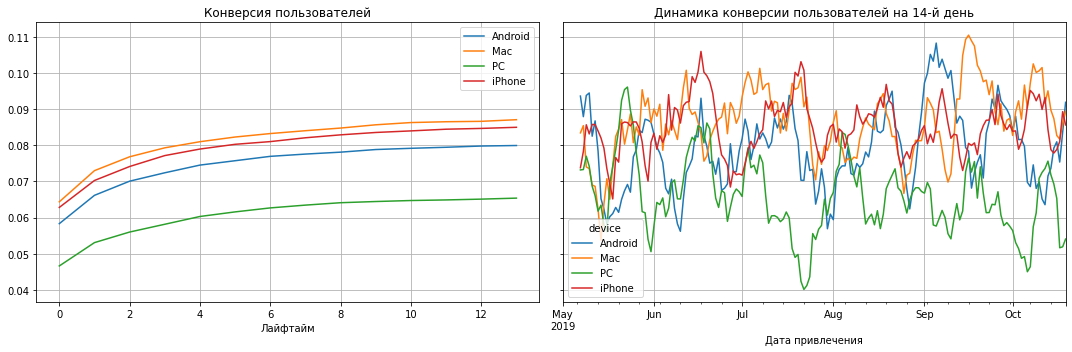

In [41]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По показателю конверсии заметно, что конверсия пользователей РС отстает от пользователей других устройств.

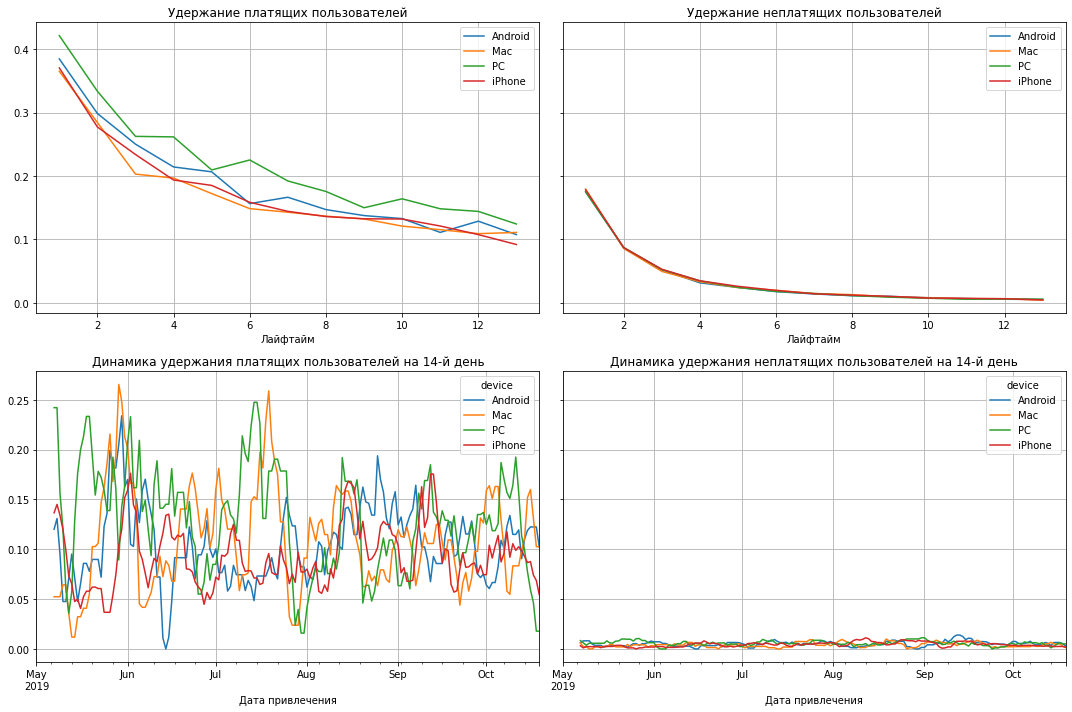

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Показатели удержания пользователей всех устройств находятся на одном уровне.

•	Проанализировать окупаемость рекламы с разбивкой по странам. 

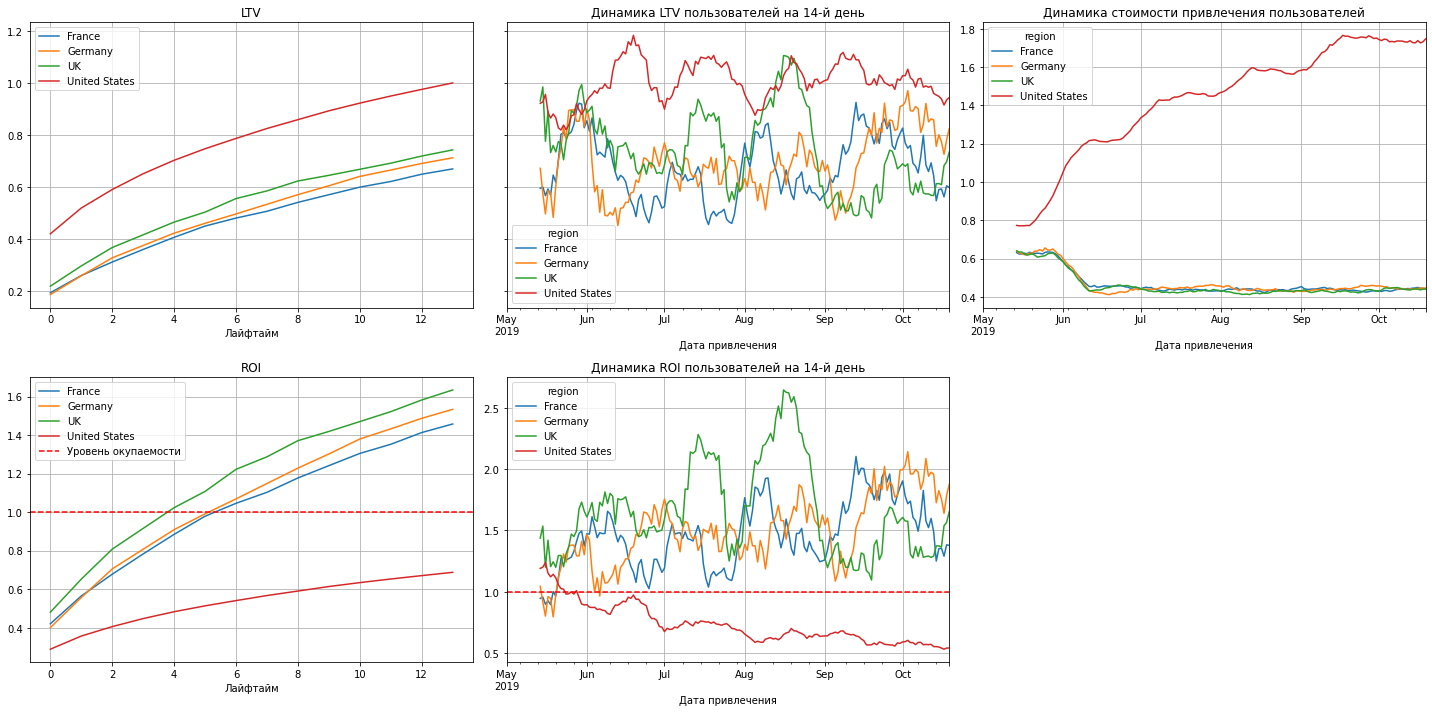

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

ROI: Самый низкий показатель у США, окупаемость в этой стране падает. Однако в других странах очень хорошая окупаемость, особенно у Великобритании.
LTV: Заметен отрыв вверх у пользователей из США, остальные пользователи стран на одном уровне.
САС: У пользователей из США также наблюдается высокий показатель относительно других пользователей.

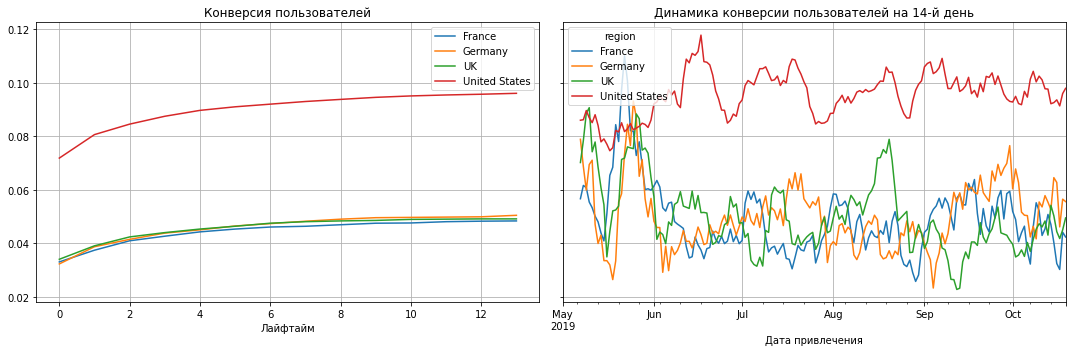

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей из США высокая

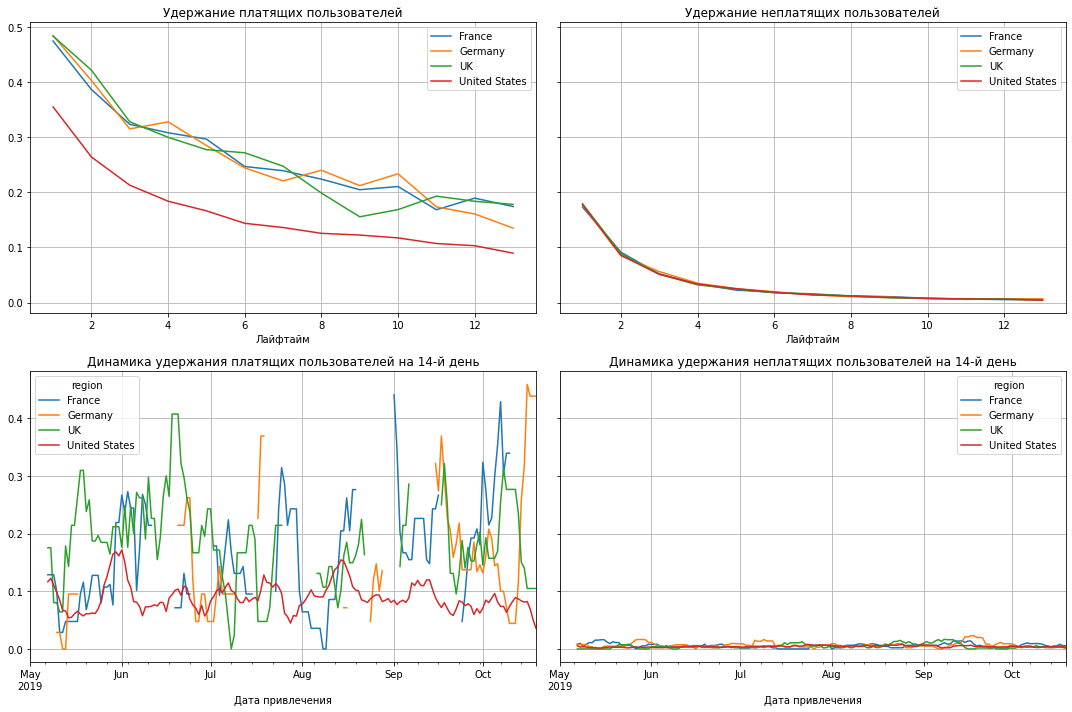

In [45]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание пользователей США на низком уровне

•	Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. 

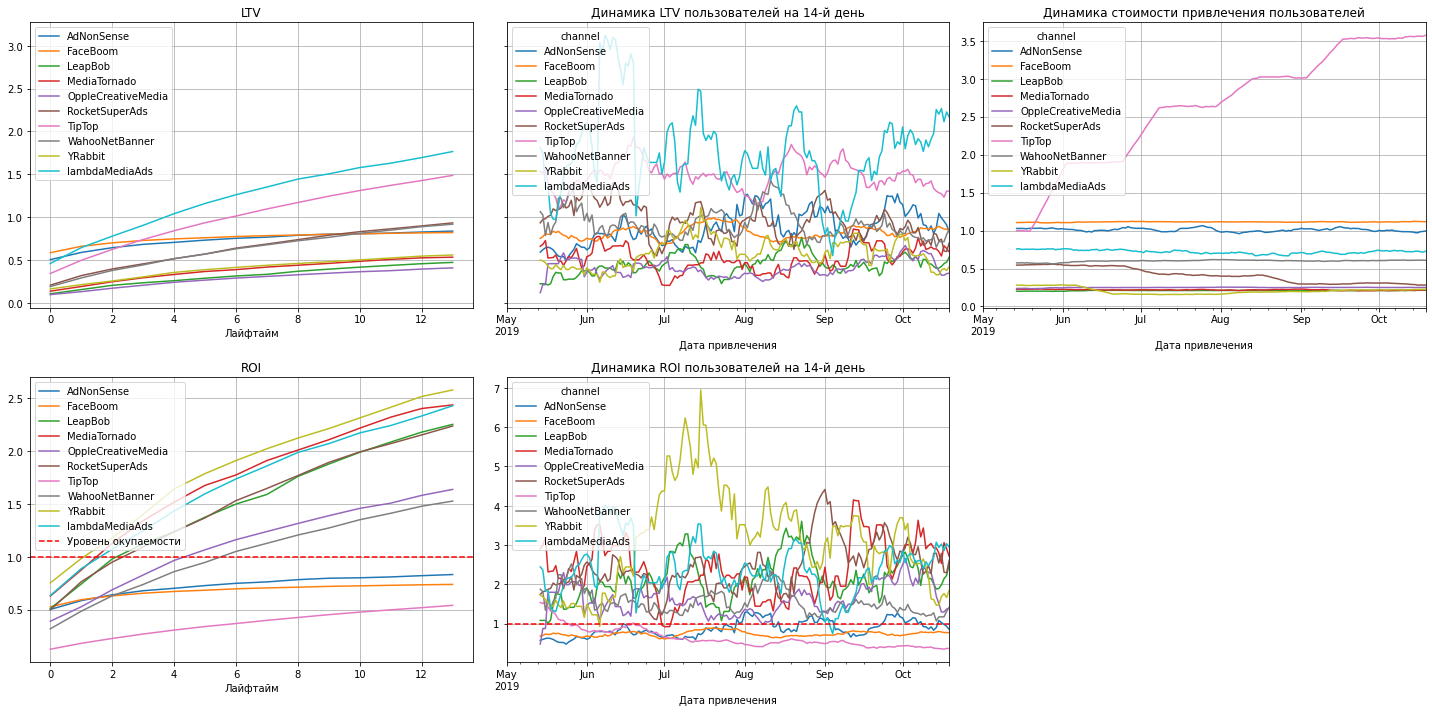

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

ROI: TipTop, FaceBoom, AdNonSense не окупаются.
LTV: У всех каналов стабильное.
САС: Показатель TipTop растет

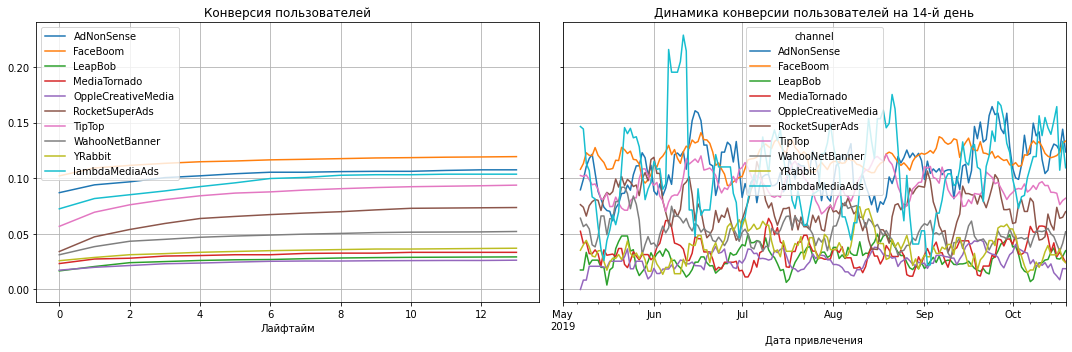

In [47]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия у всех каналов примерно на одном уровне

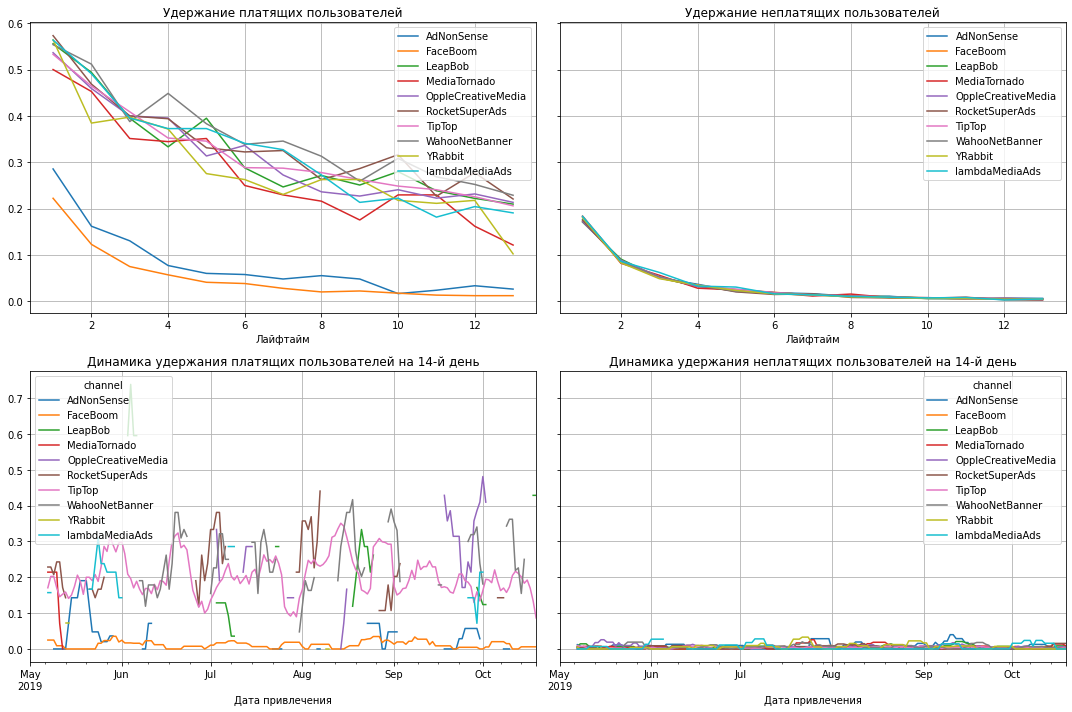

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание органических пользователей и FaceBoom на низком уровне

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Причины неэффективности привлечения пользователей:

1. По странам

В США уровень окупаемости рекламы низкий, хотя основная аудитория - пользователи из США. При этом стоимость привлечения пользователей из Америки - самая высокая, она растет;

LTV: Заметен отрыв вверх у пользователей из США, остальные пользователи стран на одном уровне.

Лучше всего окупается Великобритания. Явный аутсайдер - США. 

САС: У пользователей из США также наблюдается высокий показатель относительно других пользователей.

2. По устройствам

ROI: Пользователи с РС окупались практически весь период анализа, а пользователи других устройств нет. Однако у пользователей Android имелись положительные скачки.

LTV: Стабилен

САС: Рост показателя, особенно у iPhone и Mac

По графикам пользователи Mac, Android и iPhone конвертируются стабильно неплохо (дело в удержании). Не заметно, что пользователи каких-то утройств плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

3. По каналам

ROI: TipTop, FaceBoom, AdNonSense не окупаются. 

LTV: У всех каналов стабильное. 

Есть проблемы с каналом TipTop, заметен значительный рост затрат на привлечение.

Рекомендации:

Пользователи из США составляют 77.7%, однако их удержание на низком уровне и окупаемость снижается с июня 2019 года. Поэтому необходимо найти рычаги удержания данных пользователей, ведь их большинство, но также стоит обратить внимание на привлечение бОльшего количества пользователей из других стран (возможно развитием фич, которые пользуются спросом в этих странах).

Самые дорогостоящие платформы FaceBoom и TipTop не окупаются. Стоит уменьшить бюджет, выделяемый на эти каналы, и перенаправить на более эффективный канал . Больше всего трафика закупали у Tiptop, Faceboom. Остальные каналы привлечения обходятся довольно дешево. Плохо удерживаются пользователи из каналов Faceboom и органических пользователей. Стоит попробовать переключить внимание на более дешевые, но прибыльные каналы (прим. Lambdamediaads, Yrabbit).

Устройства Mac и iPhone: стоимость их привлечения высока, а окупаемоcть падает. Возможно, стоит сделать маркетинговое предложение для владельцев этих устройств.